# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Import dataset

In [2]:
df =pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Pre-processing

### 1) statistic summary

In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2) Find missing values

In [4]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### 3) drop dups

In [5]:
 df.drop_duplicates(inplace=True)

### 4) find outlier or anomalies

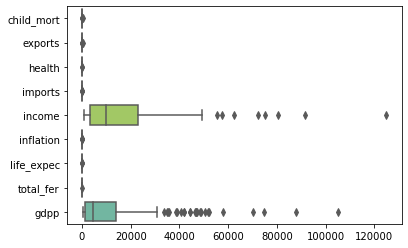

In [6]:
df_2 = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]


ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

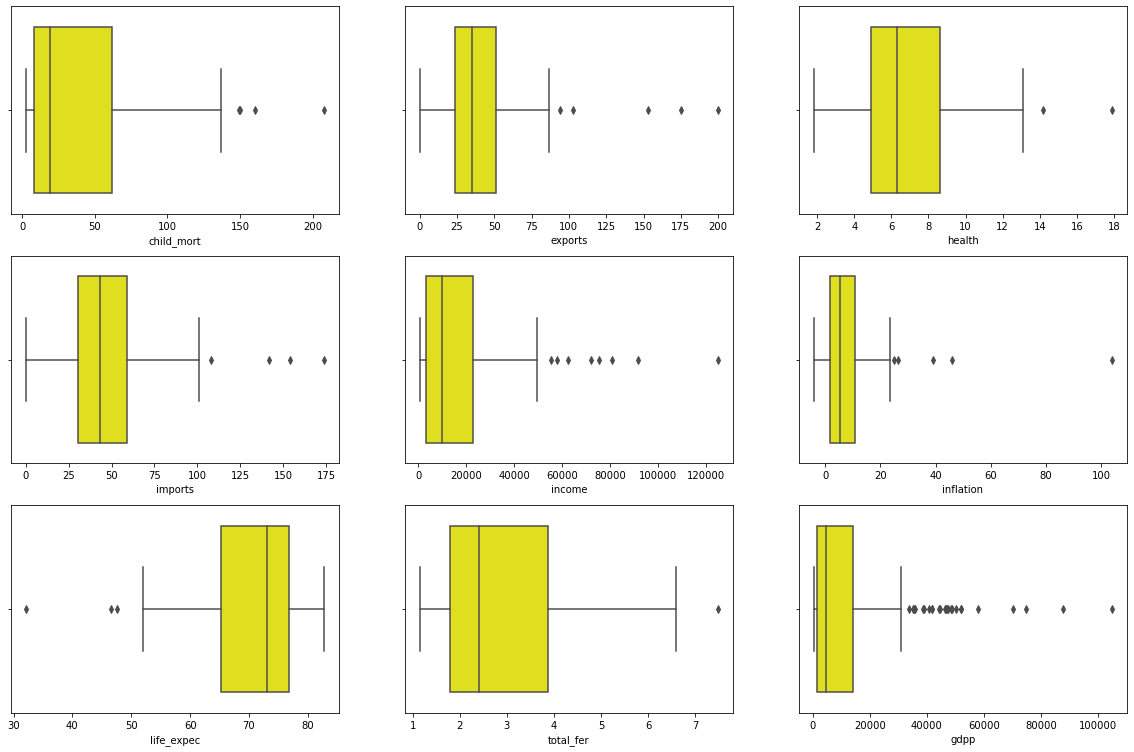

In [23]:
fig,axs=plt.subplots(3,3,figsize=(20,13))
col=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
ax=axs.flatten()
for i,j in enumerate(col):
    sns.boxplot(x=df[j],ax=ax[i],color='yellow')

### 5) regression analysis

<Figure size 1440x1440 with 0 Axes>

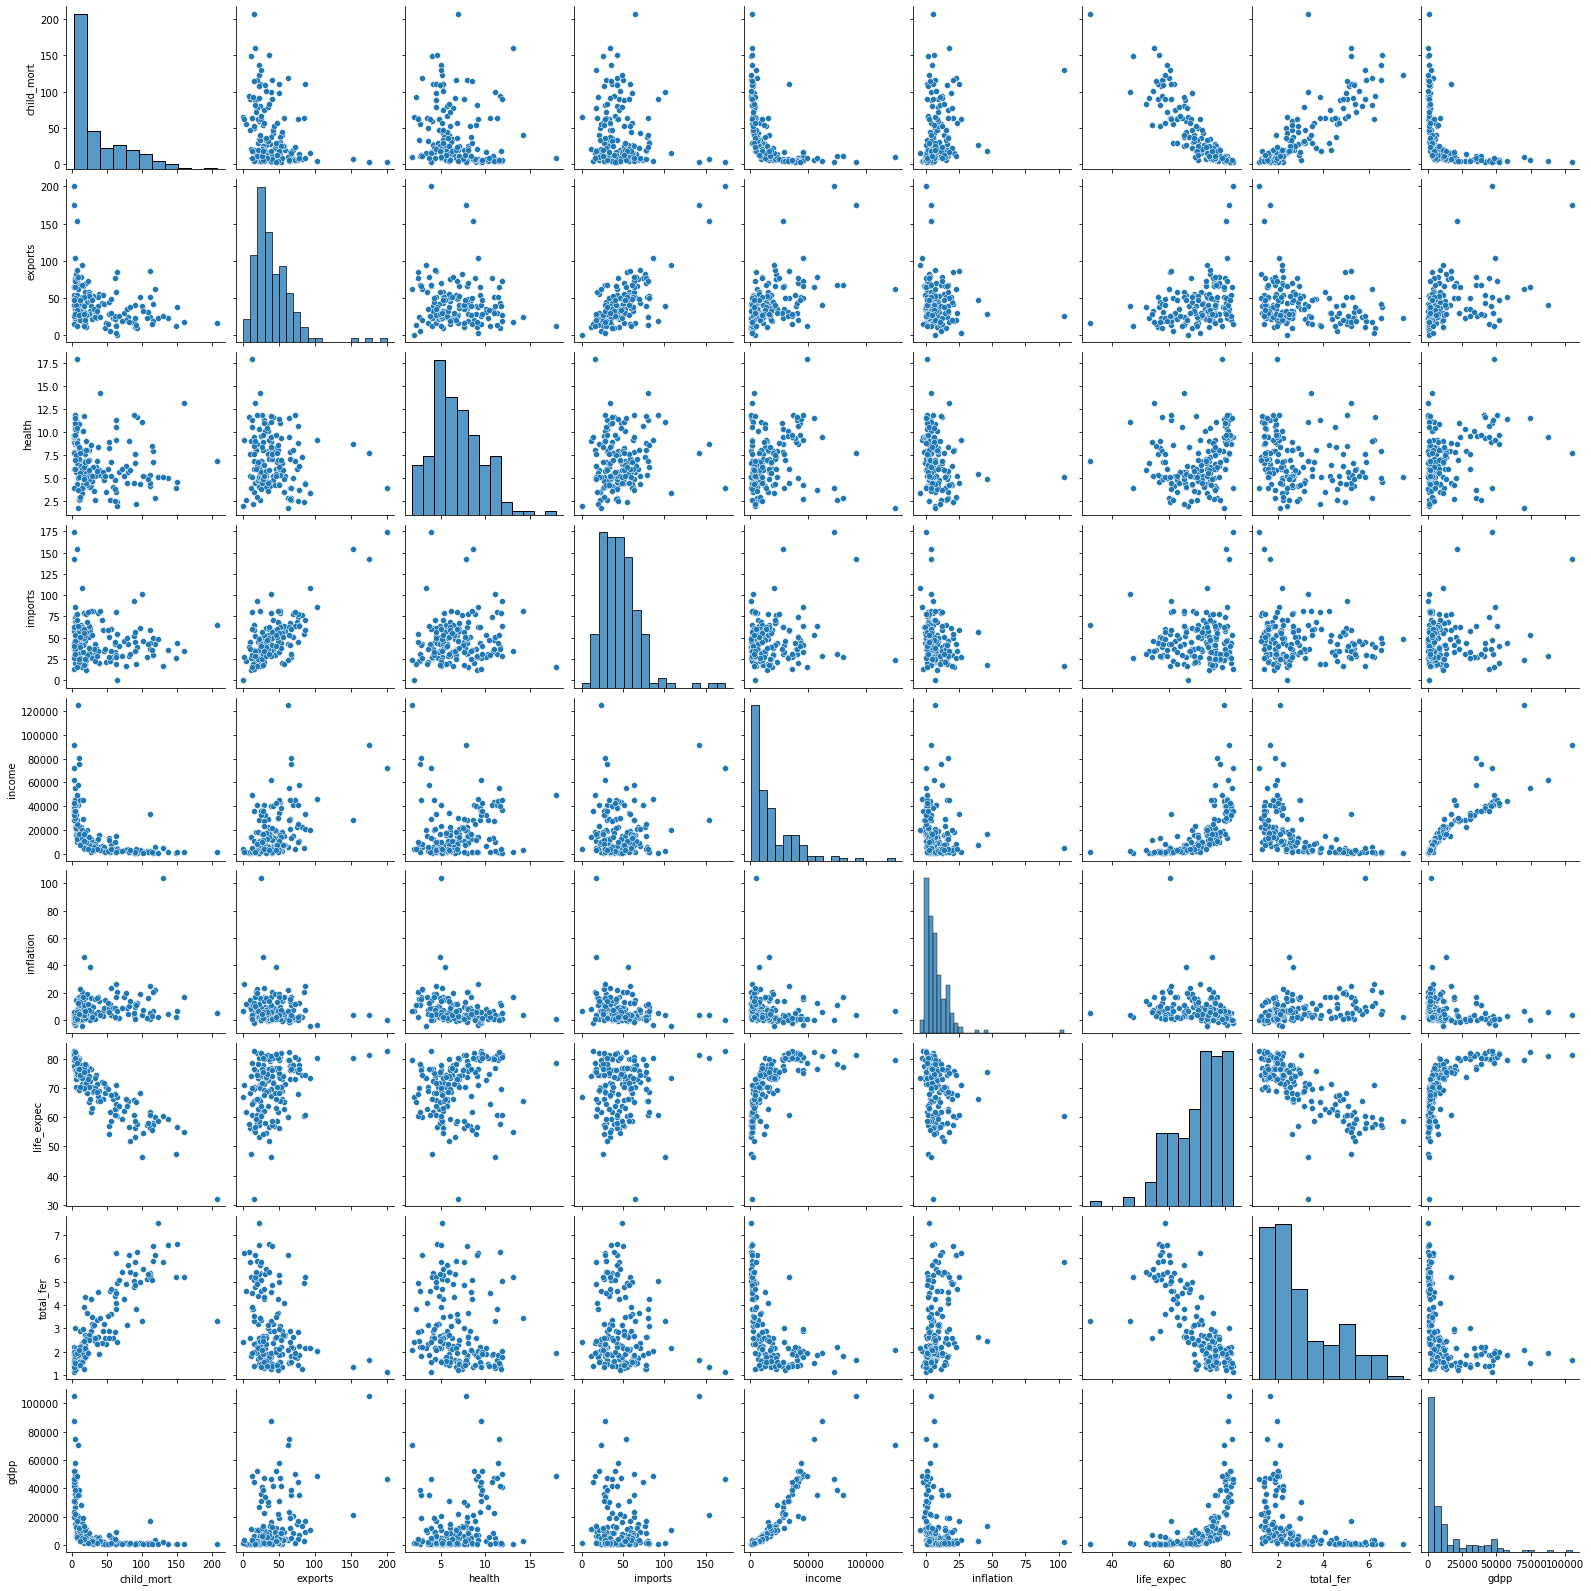

In [8]:
f = plt.figure(figsize=(20, 20))
sns.pairplot(df)

plt.savefig('pair_plot.png', bbox_inches='tight')

### 6) correlation analysis

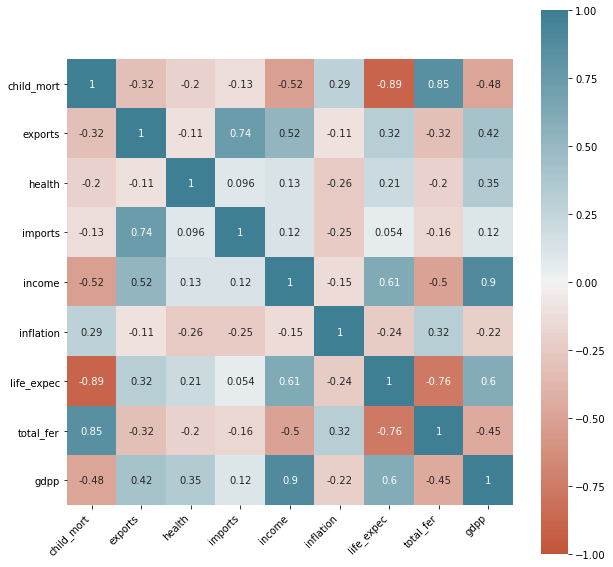

In [9]:
# Correlation Matrix
f = plt.figure(figsize=(10, 10))

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.savefig('corrMatrix.png', bbox_inches='tight')

### ***** key takeaways *****

 'child_mortality' and 'life_expentency' are strongly negatively correlated: -0.89

'child_mortality' and 'total_fertility' are strongly positively correlated: 0.85

'exports' and 'imports' are strongly positively correlated: 0.74

'life_expentency' and 'total_fertility' are strongly negatively correlated: -0.76

# Modeling

## 1) K-mean clustering

In [10]:
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### convert df to array

In [11]:
data = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

arr = data.to_numpy()
arr

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

##### find optimal k using 'Elbow Method'
##### https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

To give equal importance to all features, we need to scale the continuous features. 
We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives includes StandardScaler.

In [12]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
data=s.fit_transform(data);

As k increases, the sum of squared distance tends to zero. 
Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero. Below is a plot of sum of squared distances for k in the range specified above. 

**If the plot looks like an arm, then the elbow on the arm is optimal k!

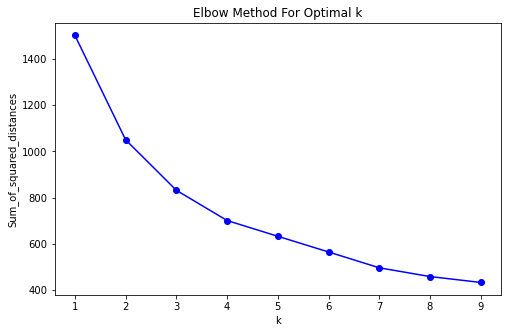

In [13]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

f = plt.figure(figsize=(8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-', marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


From elbow plot, k=3,4 are good because of large difference errors...to decide one in these two, we go for silhouette_score

### silhouette_score

https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library

In [24]:
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2873566892140671)
For n_clusters = 3, silhouette score is 0.28329575683463126)
For n_clusters = 4, silhouette score is 0.3021082505899251)
For n_clusters = 5, silhouette score is 0.218612044943398)
For n_clusters = 6, silhouette score is 0.23023841441626974)
For n_clusters = 7, silhouette score is 0.2207736413736125)
For n_clusters = 8, silhouette score is 0.24138320187612528)
For n_clusters = 9, silhouette score is 0.22377990995145627)


### Silhouette_score visualization

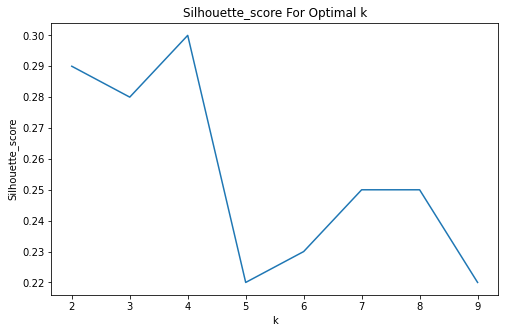

In [26]:
score=[]
plt.figure(figsize=(8,5))
for i in range(2,10):
    k=KMeans(i)
    k.fit(data)
    score.append(np.round(silhouette_score(data,k.labels_),2))

plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('Silhouette_score For Optimal k')
plt.plot(range(2,10),score)

## 2. Hierarchical Clustering

#k=2 gives good silhouette score

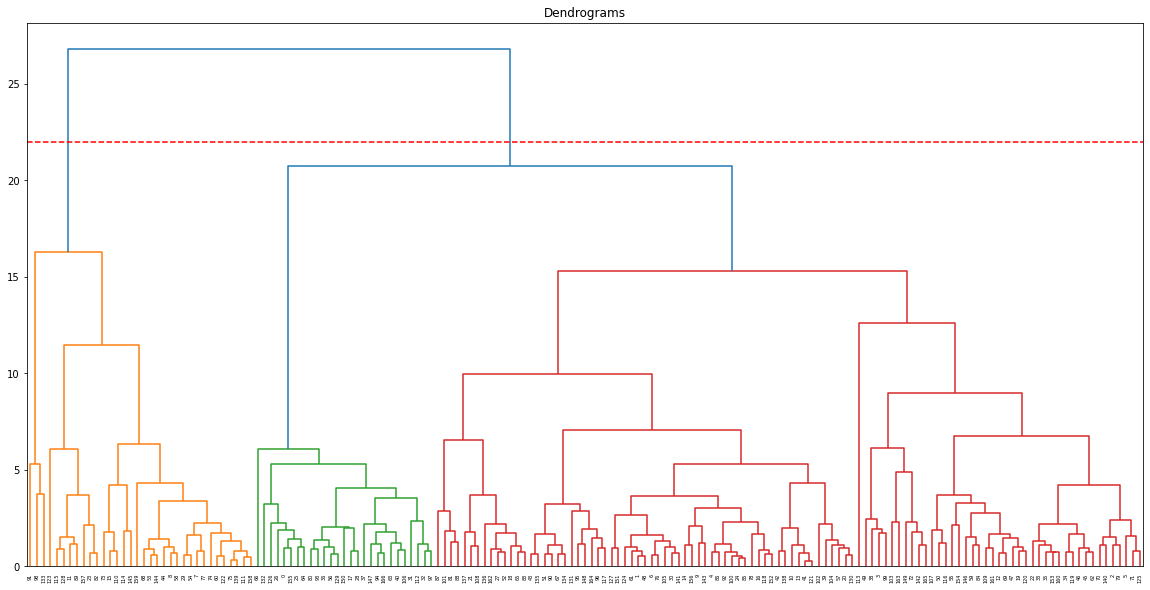

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=22, color='r', linestyle='--')

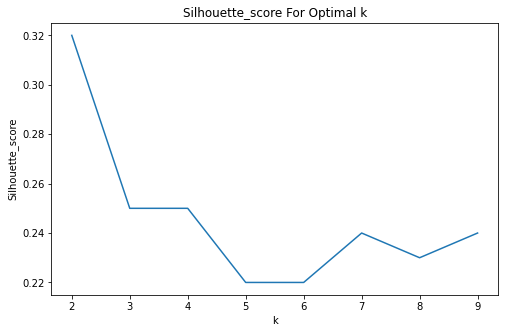

In [28]:
from sklearn.cluster import AgglomerativeClustering

score=[]
plt.figure(figsize=(8,5))
for i in range(2,10):
    a=AgglomerativeClustering(i)
    a.fit(data)
    score.append(np.round(silhouette_score(data,a.labels_),2))
    
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('Silhouette_score For Optimal k')
plt.plot(range(2,10),score)

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 3, 0, 2, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)
df['k_labels']=cluster.labels_
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [20]:
a=AgglomerativeClustering(2)
a.fit(data)
df['hier_labels']=a.labels_

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_labels,hier_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


## Accuracy Test

## clusters summary

In [40]:
viz = df[['child_mort', 'exports', 'imports','health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_labels']]

child_mort_mean = viz.groupby('k_labels')['child_mort'].mean()
imports_mean = viz.groupby('k_labels')['imports'].mean()
exports_mean = viz.groupby('k_labels')['exports'].mean()
health_mean = viz.groupby('k_labels')['health'].mean()
income_mean = viz.groupby('k_labels')['income'].mean()
inflation_mean = viz.groupby('k_labels')['inflation'].mean()
life_expec_mean = viz.groupby('k_labels')['life_expec'].mean()
total_fer_mean = viz.groupby('k_labels')['total_fer'].mean()
gdpp_mean = viz.groupby('k_labels')['gdpp'].mean()

viz_merged = round(pd.DataFrame([child_mort_mean, imports_mean, exports_mean, health_mean, income_mean,
                                 inflation_mean, life_expec_mean, total_fer_mean, gdpp_mean]).transpose(),2)
viz_merged

,child_mort,imports,exports,health,income,inflation,life_expec,total_fer,gdpp
k_labels,,,,,,,,,
Aid needed priority-1,105.07,39.66,23.59,6.51,1589.74,7.14,57.25,5.43,667.89
Aid needed priority-2,31.62,48.09,39.99,6.35,11341.89,9.12,70.92,2.65,6407.37
Aid needed priority-3,6.14,38.47,47.14,8.67,45996.77,4.27,79.84,1.94,41777.42
No Aid needed,4.13,156.67,176.00,6.79,64033.33,2.47,81.43,1.38,57566.67


In [48]:
viz_merged = viz_merged.replace({'k_labels': {0: 'Aid needed priority-2',
                                              1:'Aid needed priority-3',
                                              2:'Aid needed priority-1',
                                              3:'No Aid needed'}})
viz_merged


,child_mort,imports,exports,health,income,inflation,life_expec,total_fer,gdpp
k_labels,,,,,,,,,
Aid needed priority-1,105.07,39.66,23.59,6.51,1589.74,7.14,57.25,5.43,667.89
Aid needed priority-2,31.62,48.09,39.99,6.35,11341.89,9.12,70.92,2.65,6407.37
Aid needed priority-3,6.14,38.47,47.14,8.67,45996.77,4.27,79.84,1.94,41777.42
No Aid needed,4.13,156.67,176.00,6.79,64033.33,2.47,81.43,1.38,57566.67


## Replacing labels with 'Help needed' or 'not'

In [30]:
df = df.replace({'k_labels': {0: 'Aid needed priority-2',
                          1:'Aid needed priority-3',
                          2:'Aid needed priority-1',
                          3:'No Aid needed'},
                'hier_labels': {0: 'Aid needed',
                               1: 'No Aid needed'}})

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_labels,hier_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Aid needed priority-1,Aid needed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Aid needed priority-2,Aid needed
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Aid needed priority-2,Aid needed
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Aid needed priority-2,Aid needed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Aid needed priority-2,Aid needed
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Aid needed priority-2,Aid needed
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Aid needed priority-2,Aid needed
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Aid needed priority-2,Aid needed
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Aid needed priority-2,Aid needed


In [55]:
pd.reset_option('display.max_rows')
test = df.groupby(['k_labels','country','hier_labels']).mean()
test

child_mort  exports  \
k_labels              country        hier_labels                          
Aid needed priority-1 Afghanistan    Aid needed           90.2    10.00   
                      Benin          Aid needed          111.0    23.80   
                      Burkina Faso   Aid needed          116.0    19.20   
                      Burundi        Aid needed           93.6     8.92   
                      Cameroon       Aid needed          108.0    22.20   
...                                                        ...      ...   
Aid needed priority-3 United Kingdom No Aid needed         5.2    28.20   
                      United States  No Aid needed         7.3    12.40   
No Aid needed         Luxembourg     No Aid needed         2.8   175.00   
                      Malta          No Aid needed         6.8   153.00   
                      Singapore      No Aid needed         2.8   200.00   

                                                    health  imports  income  \
k_labels              country        hier_labels                              
Aid needed priority-1 Afghanistan    Aid needed       7.58     44.9    1610   
                      Benin          Aid needed       4.10     37.2    1820   
                      Burkina Faso   Aid needed       6.74     29.6    1430   
                      Burundi        Aid needed      11.60     39.2     764   
                      Cameroon       Aid needed       5.13     27.0    2660   
...                                                    ...      ...     ...   
Aid needed priority-3 United Kingdom No Aid needed    9.64     30.8   36200   
                      United States  No Aid needed   17.90     15.8   49400   
No Aid needed         Luxembourg     No Aid needed    7.77    142.0   91700   
                      Malta          No Aid needed    8.65    154.0   28300   
                      Singapore      No Aid needed    3.96    174.0   72100   

                                                    inflation  life_expec  \
k_labels              country        hier_labels                            
Aid needed priority-1 Afghanistan    Aid needed         9.440        56.2   
                      Benin          Aid needed         0.885        61.8   
                      Burkina Faso   Aid needed         6.810        57.9   
                      Burundi        Aid needed        12.300        57.7   
                      Cameroon       Aid needed         1.910        57.3   
...                                                       ...         ...   
Aid needed priority-3 United Kingdom No Aid needed      1.570        80.3   
                      United States  No Aid needed      1.220        78.7   
No Aid needed         Luxembourg     No Aid needed      3.620        81.3   
                      Malta          No Aid needed      3.830        80.3   
                      Singapore      No Aid needed     -0.046        82.7   

                                                    total_fer    gdpp  
k_labels              country        hier_labels                       
Aid needed priority-1 Afghanistan    Aid needed          5.82     553  
                      Benin          Aid needed          5.36     758  
                      Burkina Faso   Aid needed          5.87     575  
                      Burundi        Aid needed          6.26     231  
                      Cameroon       Aid needed          5.11    1310  
...                                                       ...     ...  
Aid needed priority-3 United Kingdom No Aid needed       1.92   38900  
                      United States  No Aid needed       1.93   48400  
No Aid needed         Luxembourg     No Aid needed       1.63  105000  
                      Malta          No Aid needed       1.36   21100  
                      Singapore      No Aid needed       1.15   46600  

[167 rows x 9 columns]

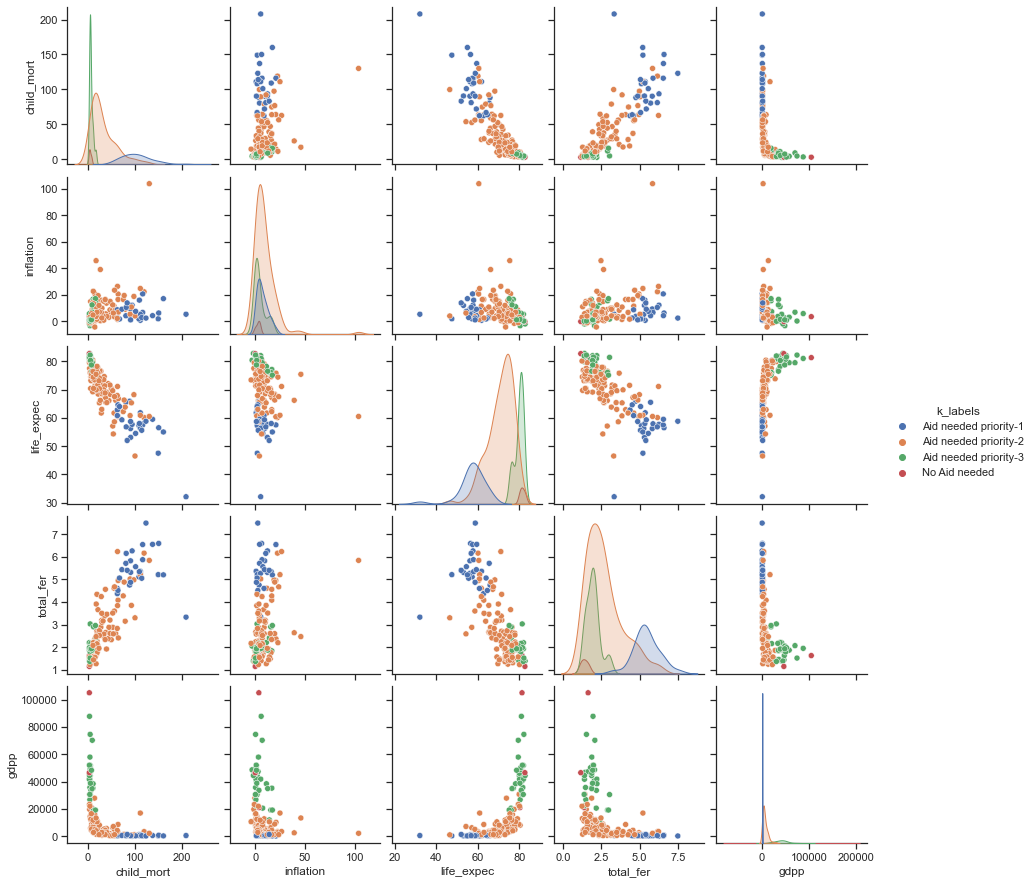

In [51]:
pair_plot = df[['k_labels','child_mort','inflation', 'life_expec', 'total_fer', 'gdpp']]
sns.set_theme(style="ticks")
sns.pairplot(pair_plot, hue="k_labels")

plt.savefig('pair_plot_aid_level.png', bbox_inches='tight')

In [ ]:
# df.to_csv('aid_clustering.csv')